# TD : Vision par ordinateur : traitement d’image

### 1. Prérequis

Préparation d’un environnement de travail Python et installation du paquet OpenCV :  
Documentation : [Documentation officielle Python](https://docs.python.org/fr/3/tutorial/venv.html)

1. Créez un dossier 📂 *VisionIndustrielle* (par exemple sur votre bureau) et ouvrez ce dossier.
2. Faites **Shift + clic droit** à l'intérieur du dossier 📂 *VisionIndustrielle*. 
3. Cliquez sur `Ouvrir la fenêtre PowerShell ici`.
4. Exécutez les commandes suivantes pour préparer un environnement Python dédié au traitement d’images :

```bash
> python --version                                 # Vérifier que la version de Python est 3.11
> python -m venv opencv_env                        # Création d'un environnement virtuel nommé "opencv_env"
> ./opencv_env/Scripts/activate                    # Activation de l'environnement virtuel
> python -m pip install --upgrade pip              # Mise à jour de l'installeur de paquets
> pip install jupyter opencv-python matplotlib     # Installation des bibliothèques OpenCV, Matplotlib et Jupyter
```

In [1]:
#!pip install opencv-python matplotlib ipykernel
import cv2
import numpy as np

### 2. Lecture d'une image en niveaux de gris

1. Consultez la documentation de la fonction `cv2.imread` dans la documentation d'OpenCV.
2. Utilisez la fonction `cv2.imread` pour lire l'image située à `"../images/fruits.jpg"` en mode niveaux de gris, en utilisant le paramètre `cv2.IMREAD_GRAYSCALE`.
3. Affichez les dimensions de l'image à l'aide de l'attribut `.shape` et identifiez les indices correspondant aux lignes et colonnes.


In [2]:
fruits_gray = cv2.imread("images/fruits.jpg", cv2.IMREAD_GRAYSCALE) # lecture de l'image
if fruits_gray is None:     # si l'image n'a pas pu etre chargée
    print("❌ Erreur: l'image n'a pas pu être chargée")
else:
    print("Les dimensions de l'image sont (nombre de lignes, nombre de colonnes):", fruits_gray.shape)

Les dimensions de l'image sont (nombre de lignes, nombre de colonnes): (421, 767)


### 3. Affichage d'une image avec le package Matplotlib

1. Consultez la documentation de la fonction `imshow` du package Matplotlib, en particulier l'utilisation du paramètre `cmap="gray"`.
2. Expérimentez en modifiant le paramètre `cmap="gray"` pour observer les effets sur l'affichage (référez-vous à la documentation).
3. Créez une fonction nommée `implot` afin de simplifier l'affichage des images dans vos analyses futures.


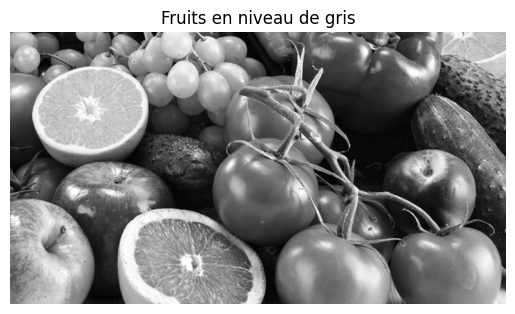

In [3]:
# affichage de l'image grise
from matplotlib import pyplot as plt
plt.imshow(fruits_gray, cmap="gray")
plt.title('Fruits en niveau de gris')
plt.axis('off')
plt.show()


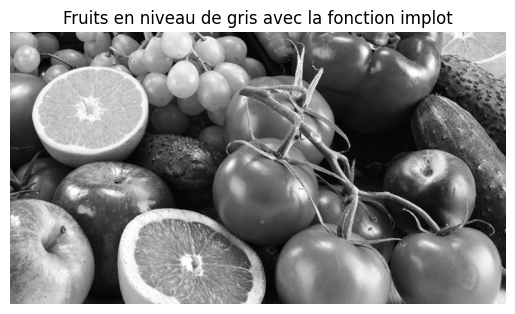

In [4]:
# création d'une fonction implot réutilisable autant de fois que nécessaire
def implot(image, title):
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

# utilisation de la fonction implot pour ré-afficher l'image 
implot(fruits_gray, "Fruits en niveau de gris avec la fonction implot")

### 4. Image en couleur

1. Utilisez la fonction `cv2.imread` pour lire l'image située à `"../images/fruits.jpg"` avec le paramètre `cv2.IMREAD_UNCHANGED`.
2. Affichez les dimensions de l'image à l'aide de l'attribut `.shape` et identifiez les indices correspondant aux lignes, colonnes et canaux de couleur.
3. Affichez l'image en couleur en utilisant la fonction `implot`.
4. Recherchez des informations sur les différents encodages des images couleur sur ordinateur (par exemple : RGB, BGR, LAB, HSV, etc.).
5. Documentez-vous sur ce qu'est un filtre de Bayer et son rôle dans les capteurs d'image.


Les dimensions de l'image sont (nombre de lignes, nombre de colonnes, nombre de couleurs): (421, 767, 3)


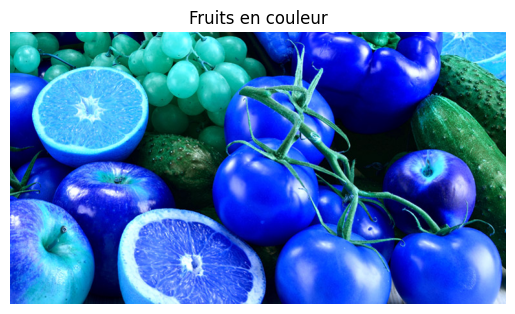

In [5]:
fruits_bgr = cv2.imread("images/fruits.jpg", cv2.IMREAD_UNCHANGED) 
if fruits_bgr is None:     # si l'image n'a pas pu etre chargée
    print("❌ Erreur: l'image n'a pas pu être chargée")
else:
    print("Les dimensions de l'image sont (nombre de lignes, nombre de colonnes, nombre de couleurs):", fruits_bgr.shape)
    
implot(fruits_bgr, "Fruits en couleur")

### 5. Affichage de l'image en couleur avec OpenCV

1. Utilisez les fonctions `cv2.imshow` et `cv2.waitKey` pour afficher une image en couleur. Consultez des exemples dans la documentation en ligne d'OpenCV.
2. Créez une fonction nommée `imshow_cv` afin de simplifier l'affichage des images pour les prochaines manipulations.



In [6]:
# fonction pour afficher une image en format opencv
def imshow_cv(image,  winname = 'Image OpenCV'):
    cv2.imshow(winname, image)
    while(True):        # boucle d'affichage de l'image
        k = cv2.waitKey(60)
        if not cv2.getWindowProperty(winname, cv2.WND_PROP_VISIBLE):  # when window is close get out of the loop
            break
        if k == -1:  # if no key was pressed, -1 is returned
            continue
        else:
            break
    cv2.destroyAllWindows()

# affichage de l'image avec la librairie opencv    
# imshow_cv(fruits_bgr, "fruits_bgr")

### 6. Convertir l'image en RGB pour l'afficher correctement avec Matplotlib

1. Convertissez l'image en RGB en inversant directement les canaux de couleur à l'aide d'une manipulation des indices du tableau en Python.  
2. Alternativement, utilisez la fonction `cv2.cvtColor` pour effectuer la conversion. Consultez la documentation pour plus de détails.


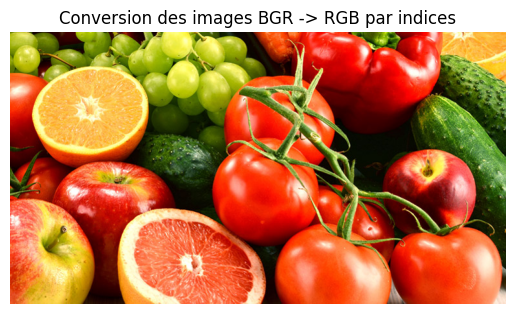

In [7]:
# 1. Conversion des images BGR -> RGB, en utilisant la fonction opencv
fruits_rgb = fruits_bgr[...,[2,1,0]]
implot(fruits_rgb, "Conversion des images BGR -> RGB par indices")

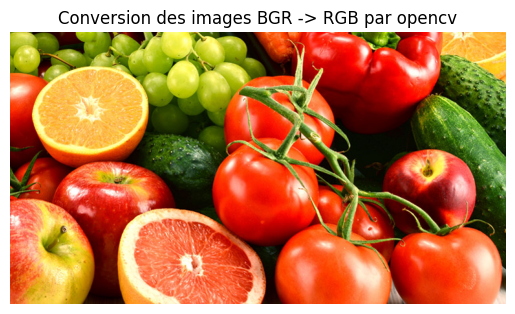

In [8]:
# 2. Conversion des images BGR -> RGB, en utilisant la fonction opencv
fruits_rgb_cv = cv2.cvtColor(fruits_bgr, cv2.COLOR_BGR2RGB)
implot(fruits_rgb_cv, "Conversion des images BGR -> RGB par opencv")

### 7. Afficher les images des différents canaux de couleurs (Rouge, Vert, Bleu)

1. Affichez les canaux de couleur rouge, vert et bleu séparément.
2. Concaténez les images des canaux dans une seule image ayant des dimensions `(3 * largeur x hauteur)` ou `(largeur x 3 * hauteur)`. Vous pouvez utiliser `np.vstack` ou `cv2.hconcat` pour cela.
3. Affichez l'image concaténée.
4. Affichez également les différents canaux pour les encodages LAB et HSV. Utilisez `cv2.cvtColor` pour effectuer la conversion vers les encodages LAB et HSV.


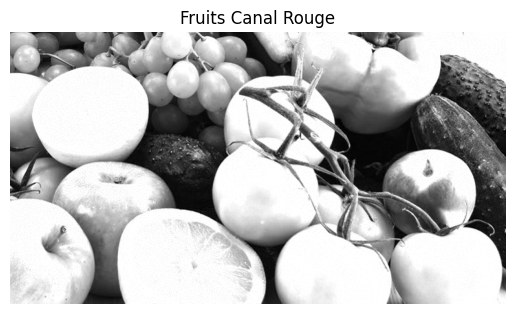

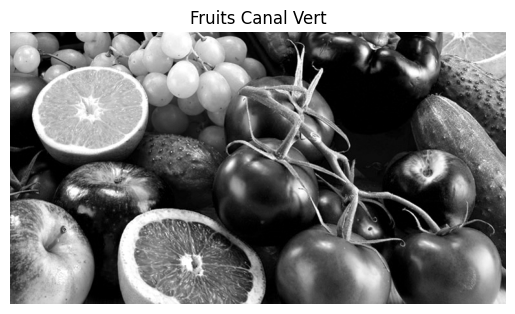

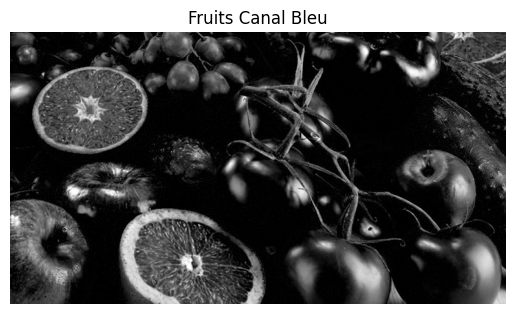

In [9]:
fruits_rouge = fruits_rgb[...,0]
fruits_vert = fruits_rgb[...,1]     
fruits_bleu = fruits_rgb[...,2]

implot(fruits_rouge, "Fruits Canal Rouge")
implot(fruits_vert, "Fruits Canal Vert")
implot(fruits_bleu, "Fruits Canal Bleu")

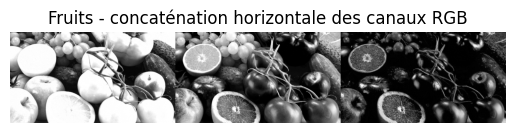

In [10]:
# Concaténation horizontale des différents canaux couleurs dans une seule image
fruits_concat = cv2.hconcat([fruits_rouge, fruits_vert, fruits_bleu])
implot(fruits_concat, "Fruits - concaténation horizontale des canaux RGB")

### 8. Opérations élémentaires entre images en niveaux de gris

1. Sélectionnez le canal rouge, vert et/ou bleu d'une image.
2. Testez des opérations élémentaires telles que l'addition, la soustraction, la multiplication entre les canaux, en utilisant soit les opérateurs de NumPy (`+`, `-`, `/`, `*`), soit les fonctions d'OpenCV (`cv2.add`, `cv2.subtract`, `cv2.multiply`, `cv2.divide`, etc.).
3. Les résultats obtenus sont-ils cohérents ? Quelle est la dynamique ou la profondeur (depth) de l'image ? Vous pouvez vérifier cela en affichant la propriété `dtype` de l'image avec l'instruction `nom_de_mon_image.dtype`.
4. Modifiez la profondeur des images pour effectuer les calculs en utilisant des valeurs flottantes en 32 bits. Pour ce faire, utilisez la méthode NumPy `mon_image.astype(np.float32)`.


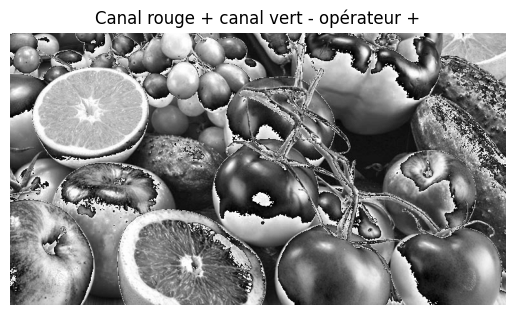

fruits_rouge profondeur : uint8


In [11]:
image_rv = fruits_rouge + fruits_vert
implot(image_rv, "Canal rouge + canal vert - opérateur +")
print("fruits_rouge profondeur :", image_rv.dtype)

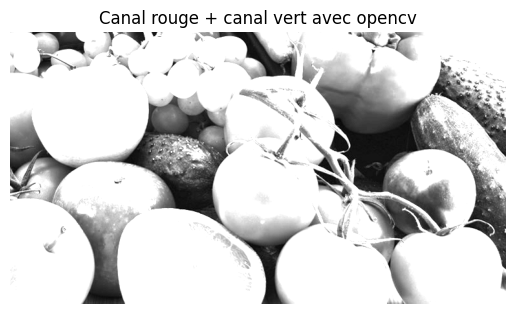

fruits_rouge profondeur : uint8


In [12]:
image_rv_cv = cv2.add(fruits_rouge,fruits_vert)
implot(image_rv_cv, "Canal rouge + canal vert avec opencv")
print("fruits_rouge profondeur :", image_rv_cv.dtype)

### 9. Opérations élémentaires entre images couleurs

1. Chargez deux images couleurs. Créez une fonction permettant de lire une image au format BGR avec `cv2.imread` et le paramètre `cv2.IMREAD_UNCHANGED`, tout en la convertissant automatiquement au format RGB pour simplifier les affichages futurs.
2. Testez des opérations élémentaires sur les images couleurs, telles que l'addition, la soustraction, la multiplication ou la division. Utilisez soit les opérateurs de NumPy (`+`, `-`, `/`, `*`), soit les fonctions d'OpenCV (`cv2.add`, `cv2.subtract`, `cv2.multiply`, `cv2.divide`, `cv2.addWeighted`, etc.).
3. Testez des opérateurs binaires sur les images, comme ceux proposés par NumPy (`np.bitwise_and`, `np.bitwise_or`, `np.bitwise_xor`) ou OpenCV (`cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`).


### 10. Filtrage 

1. Choisissez une image de votre choix et appliquez un filtre de type `cv2.boxFilter` ou `cv2.GaussianBlur` pour lisser l'image.
2. Répétez l'opération en utilisant un filtre médian avec la fonction `cv2.medianBlur`.


### 11. Fonction de génération aléatoire de bruit gaussien :

In [13]:
# fonction pour ajouter artificiellement du bruit à une image
def add_noise(img, mean = 0, stddev = 36, threshold = None):
    noise = np.zeros(img.shape, np.uint8)
    cv2.randn(noise, np.asarray([mean,mean,mean]),  np.asarray([stddev,stddev,stddev]))
    if threshold:
        noise = np.where(noise>threshold, noise, 0)
    noisy_img = cv2.add(img, noise)
    return noisy_img

### 12. Filtrage du bruit

1. Appliquez les filtres sur une image bruitée en utilisant la fonction `add_noise` (fournie précédemment) pour ajouter artificiellement du bruit à une image.  
2. Expérimentez avec différents paramètres pour le bruit et testez plusieurs techniques de filtrage (`cv2.boxFilter`, `cv2.GaussianBlur`, `cv2.medianBlur`).


### 13. Filtrage pour la détection de contours

1. Appliquez un filtre de type gradient (`cv2.Sobel`) sur une image couleur, en analysant les gradients dans les directions X et Y.  
2. Modifiez les paramètres du filtre pour observer leurs effets.  
3. Combinez les gradients X et Y en utilisant `cv2.magnitude` ou une combinaison de `cv2.convertScaleAbs` et `cv2.addWeighted`.  
4. Facilitez l'affichage des résultats en normalisant les valeurs avec `cv2.normalize` et le paramètre `norm_type=cv2.NORM_MINMAX`.  
5. Expérimentez la détection des contours avec le filtre `cv2.Laplacian`.


### 14. Fonction de seuillage / Segmentation

1. Additionnez les canaux R, G et B de l'image résultant de l'application du gradient.  
2. Appliquez un seuillage sur une image en niveaux de gris (ou sur l'un des canaux R, G ou B d'une image) à l'aide des fonctions suivantes :  
   - `cv2.threshold`  
   - `cv2.adaptiveThreshold`  
   - `cv2.inRange`



### 15. Morphologie mathématique

1. Sur une image segmentée, testez les fonctions morphologiques suivantes :  
   - `cv2.erode`  
   - `cv2.dilate`  
   - `cv2.morphologyEx`  
2. Expliquez ce qu'est une ouverture et une dilatation.


### 16. Détection de contours : Canny

1. Utilisez la fonction avancée de détection de contours `cv2.Canny`.  
2. Utilisez la fonction `cv2.countNonZero` pour compter le nombre de pixels correspondant aux contours détectés.


### 17. Manipulation des images  

1. Testez la fonction `cv2.resize`.  
2. Testez la fonction `cv2.pyrDown`.  
3. Testez la fonction `cv2.flip` avec différents paramètres.  
4. Sélectionnez une région d’intérêt dans une image.


### 18. Dessin dans une image  

1. Recherchez comment afficher du texte avec OpenCV (`cv2.putText`).  
2. Affichez une ligne (`cv2.line`).  
3. Dessinez un rectangle (`cv2.rectangle`).  
4. Dessinez un cercle (`cv2.circle`).  
5. Dessinez une ellipse (`cv2.ellipse`).  


### 19. Afficher l'histogramme du canal rouge  

1. Sélectionnez l'image du canal rouge.  
2. Recherchez des informations sur ce qu'est un histogramme.  
3. Calculez son histogramme avec `cv2.calcHist` ou `np.histogram`.  
4. Affichez son histogramme avec `plt.hist`.  


### 20. Aller plus loin

Tutoriels de traitement d'image :  
- [OpenCV Tutorial - Introduction](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)  
- [OpenCV Tutorial - Image Processing](https://docs.opencv.org/4.8.0/d2/d96/tutorial_py_table_of_contents_imgproc.html)


### 21. Application à la détection de défaut : Contrôle d'ébréchure

1. Charger l'image ```"../images/controle-ebrechure.jpg"``` et l'image ```"../images/controle-ebrechure_2.jpg"```.
2. Effectuer la différence entre ces deux images.
3. Appliquer un seuillage sur la différence des deux images.
4. Compter le nombre de pixels différents dans l'image seuillée avec la fonction ```cv2.countNonZero```.
5. Réaliser la même opération, mais en ajoutant du bruit dans les images à l'aide de la fonction ```add_noise```.
